In [8]:
from plotnine import *
import pandas as pd
import numpy as np

In [9]:
df_detailed = pd.read_csv('../F1_score_csvs/detailed.csv')
df_detailed = df_detailed[~df_detailed['method'].isin(['BIC.1', 'mmit.1', 'mmit.2', 'mmit.4'])]
df_detailed['dataset'] = ' detailed \n N = 3730'

df_systematic = pd.read_csv('../F1_score_csvs/systematic.csv')
df_systematic = df_systematic[~df_systematic['method'].isin(['BIC.1', 'mmit.1', 'mmit.2', 'mmit.117'])]
df_systematic['dataset'] = ' systematic \n N = 3418'

df_epigenomic = pd.read_csv('../F1_score_csvs/epigenomic.csv')
df_epigenomic = df_epigenomic[~df_epigenomic['method'].isin(['BIC.1', 'mmit.117'])]
df_epigenomic['dataset'] = 'epigenomic \n N = 4913'
df = pd.concat([df_detailed, df_epigenomic, df_systematic, ])

avg_df = df.groupby(['dataset', 'method', 'feature engineer']).agg(
    mean_acc=('acc', 'mean'),
    std_acc=('acc', 'std')
).reset_index()

In [10]:
# Create a copy for comparison
acc_compare_df = avg_df.copy()

# Set the lower and upper bounds using mean ± standard deviation
acc_compare_df['lower_bound'] = acc_compare_df['mean_acc'] - acc_compare_df['std_acc']
acc_compare_df['upper_bound'] = acc_compare_df['mean_acc'] + acc_compare_df['std_acc']

In [11]:
acc_compare_df['method'] = pd.Categorical(acc_compare_df['method'], 
                                          categories=['BIC.1', 'mmit.1', 'mmit.2', 'mmit.4', 'mmit.117', 'linear.1', 'linear.2', 'linear.4','linear.117', 'aft_xgboost.1', 'aft_xgboost.2', 'aft_xgboost.4', 'aft_xgboost.117', 'mlp.1', 'mlp.2', 'mlp.4', 'mlp.117'], ordered=True)

In [12]:
# Find the maximum accuracy per dataset and add 0.5 for padding
max_acc_per_dataset = acc_compare_df.groupby('dataset')['upper_bound'].max().reset_index()
max_acc_per_dataset.loc[:, 'upper_bound'] += 0.5

# Define colors for proposed and existing methods
method_colors = {
    'proposed': 'red',
    'previous  ': 'black'
}

# Create a new column indicating whether the method is proposed or existing
acc_compare_df['category'] = 'previous  '
acc_compare_df.loc[acc_compare_df['method'].str.startswith('mlp'), 'category'] = 'proposed'

# Replace method names ending with .117 with .all
acc_compare_df['method'] = acc_compare_df['method'].str.replace(r'\.117$', '.all', regex=True)

# Update the plot after replacing method names
plot_combined = (ggplot(acc_compare_df, aes(x='mean_acc', y='method', color='category')) +
                 geom_point(shape="D", size=2, fill="white") +
                 geom_errorbarh(aes(xmin='lower_bound', xmax='upper_bound'), height=0.001) +
                 labs(x="F1 score",
                      y="method") +
                 facet_wrap('~dataset', ncol=acc_compare_df['dataset'].nunique(), scales='free_x') +
                 theme_minimal() +
                 theme(aspect_ratio=1.9) +
                 geom_vline(data=max_acc_per_dataset, mapping=aes(xintercept='upper_bound'), color='black') + 
                 scale_color_manual(values=method_colors) +
                 theme(figure_size=(9, 6),
                       axis_text=element_text(size=9.5),
                       axis_title=element_text(size=14),
                       legend_title=element_text(size=14),
                       legend_text=element_text(size=14),
                       strip_text=element_text(size=14)) +   # Adjusts the facet labels' font size
                 guides(color=guide_legend(title="method"))  # Manual legend
                 )

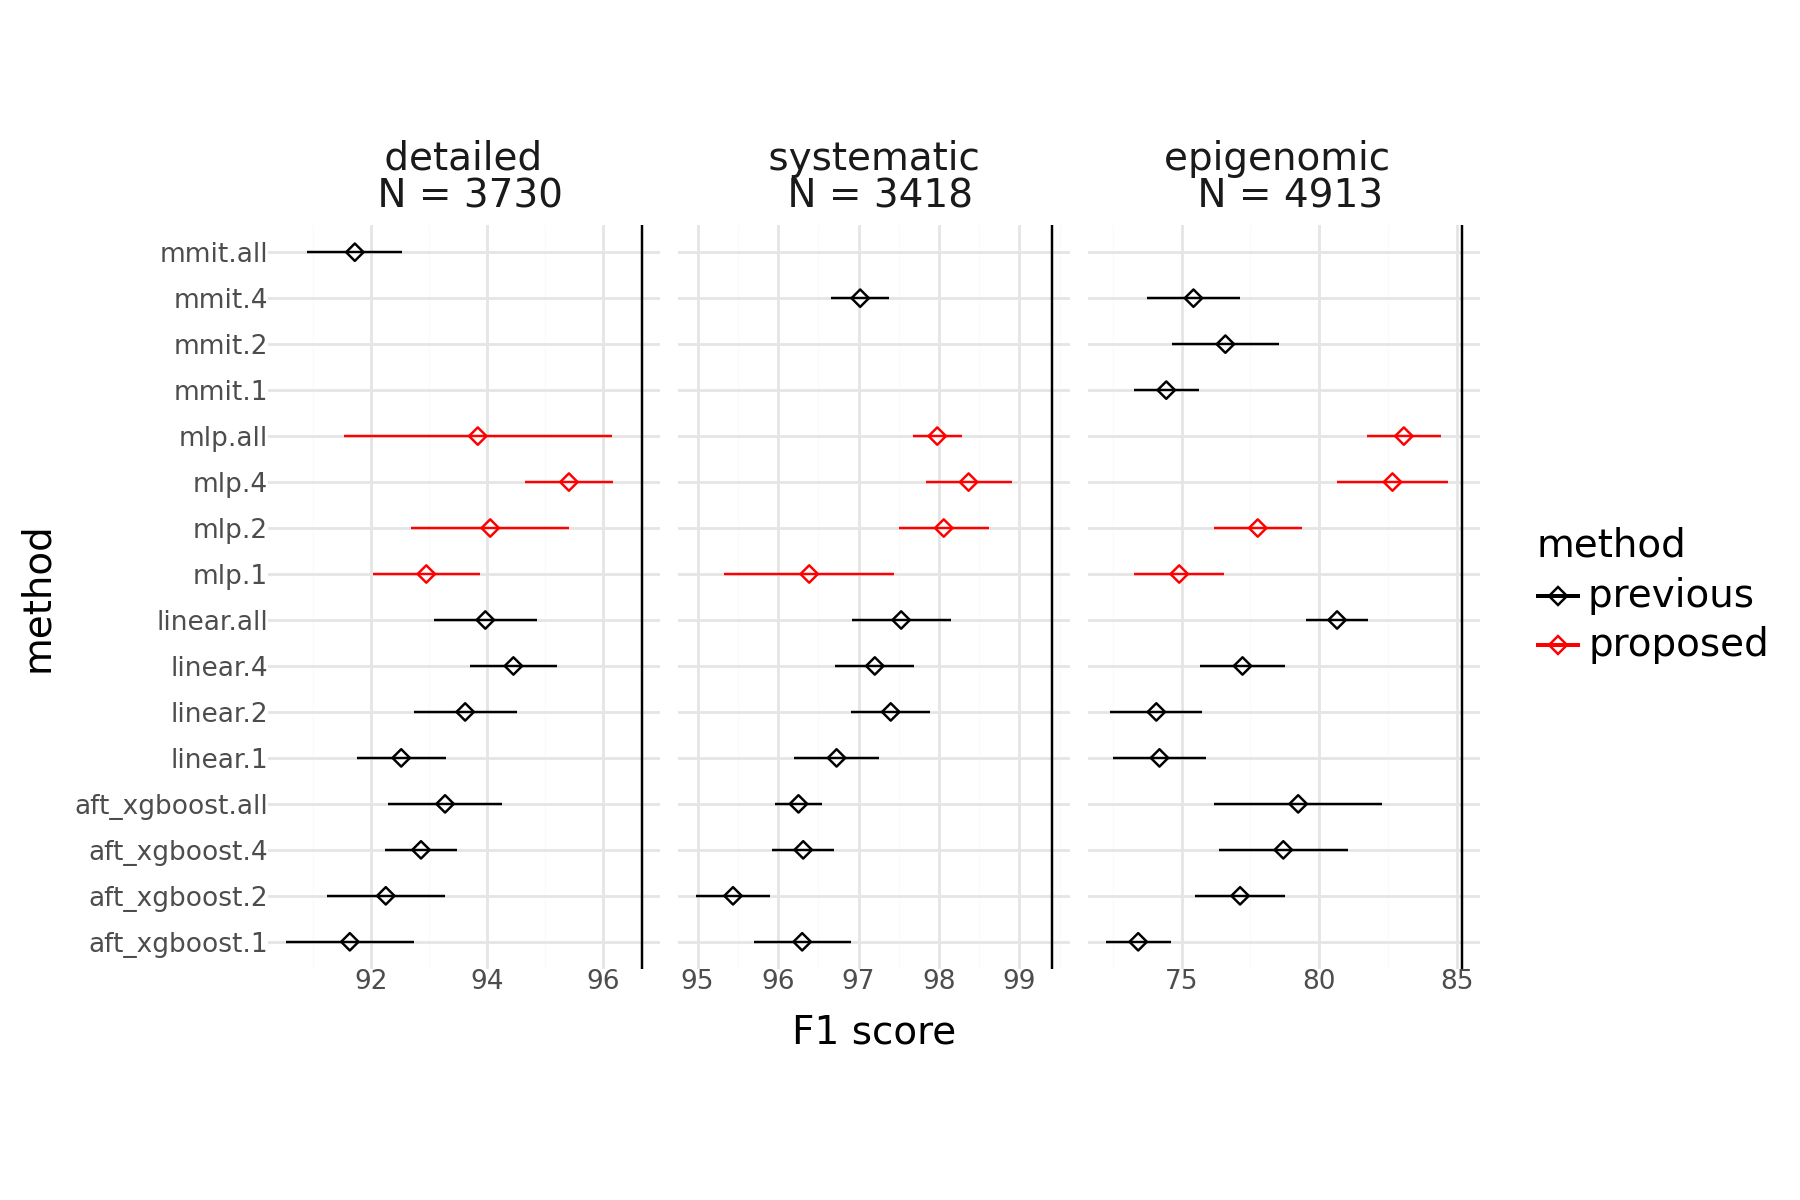

In [13]:
plot_combined

In [14]:
plot_combined.save("F1_compare.pdf")
plot_combined.save("F1_compare.jpg")

c:\Users\nguye\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 9 x 6 in image.
c:\Users\nguye\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: F1_compare.pdf
c:\Users\nguye\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 9 x 6 in image.
c:\Users\nguye\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: F1_compare.jpg
